In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline #import libraries

In [4]:
train=pd.read_csv('train.csv')
train.head() #import file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum()  #total null values

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [16]:
train.replace(" ", np.nan,inplace=True)  #replace missing values

In [17]:
train.head() #first 5rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train.duplicated().sum() #total duplicated values

0

In [22]:
train.nunique() #no of unique columns 

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [23]:
train.info() #info about file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [35]:
train.drop('Cabin',axis=1,inplace=True)
train.head() #cabin have more missing values so delete the column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [69]:
train['family_members']=train.SibSp+train.Parch
train.drop(['SibSp','Parch'],inplace=True,axis=1)

train.head() #combining column

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,famiy_members,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,0


<Axes: xlabel='Age', ylabel='Density'>

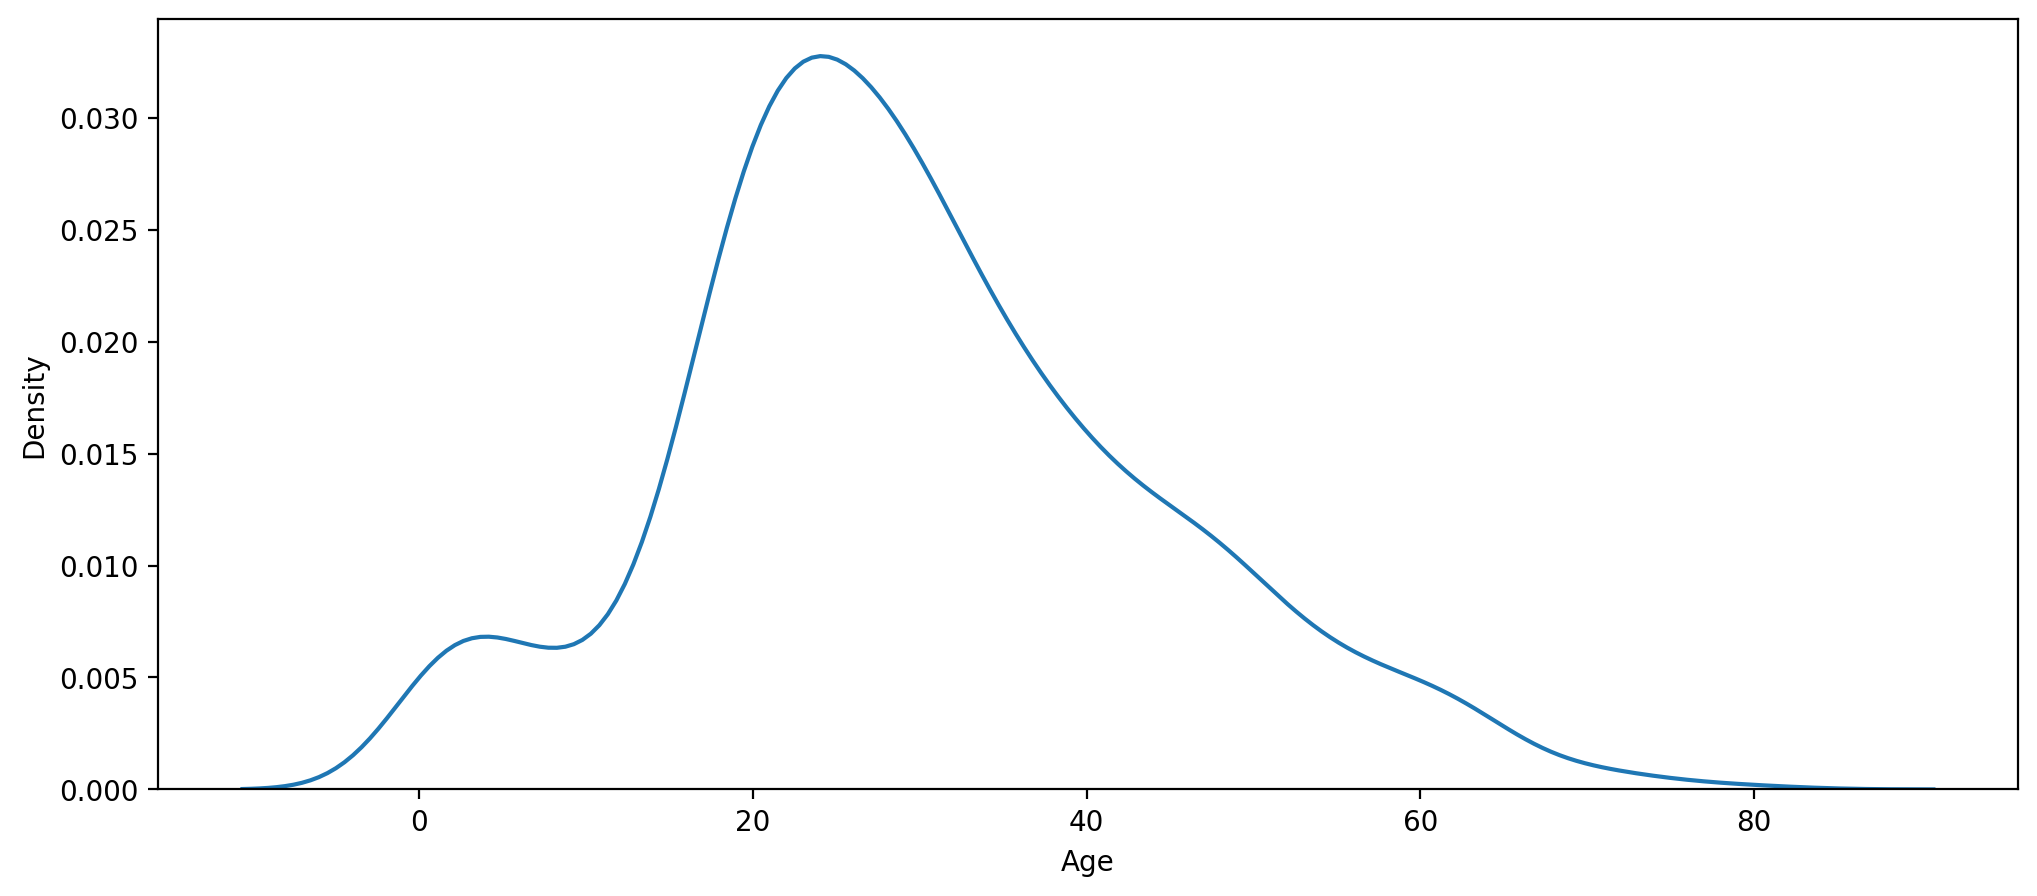

In [34]:
plt.figure(figsize=(12,5),dpi=200)
sns.distplot(train.Age,hist=False) #age group from 20 to 40 is more

In [36]:
mean_age=train.Age.mean()
train.Age.replace(np.nan,mean_age,inplace=True) #replace null value with average

In [37]:
mode_emb=train.Embarked.mode()[0]
train.Embarked.replace(np.nan,mode_emb,inplace=True) #replace null value with repaeted value

<Axes: xlabel='Survived', ylabel='count'>

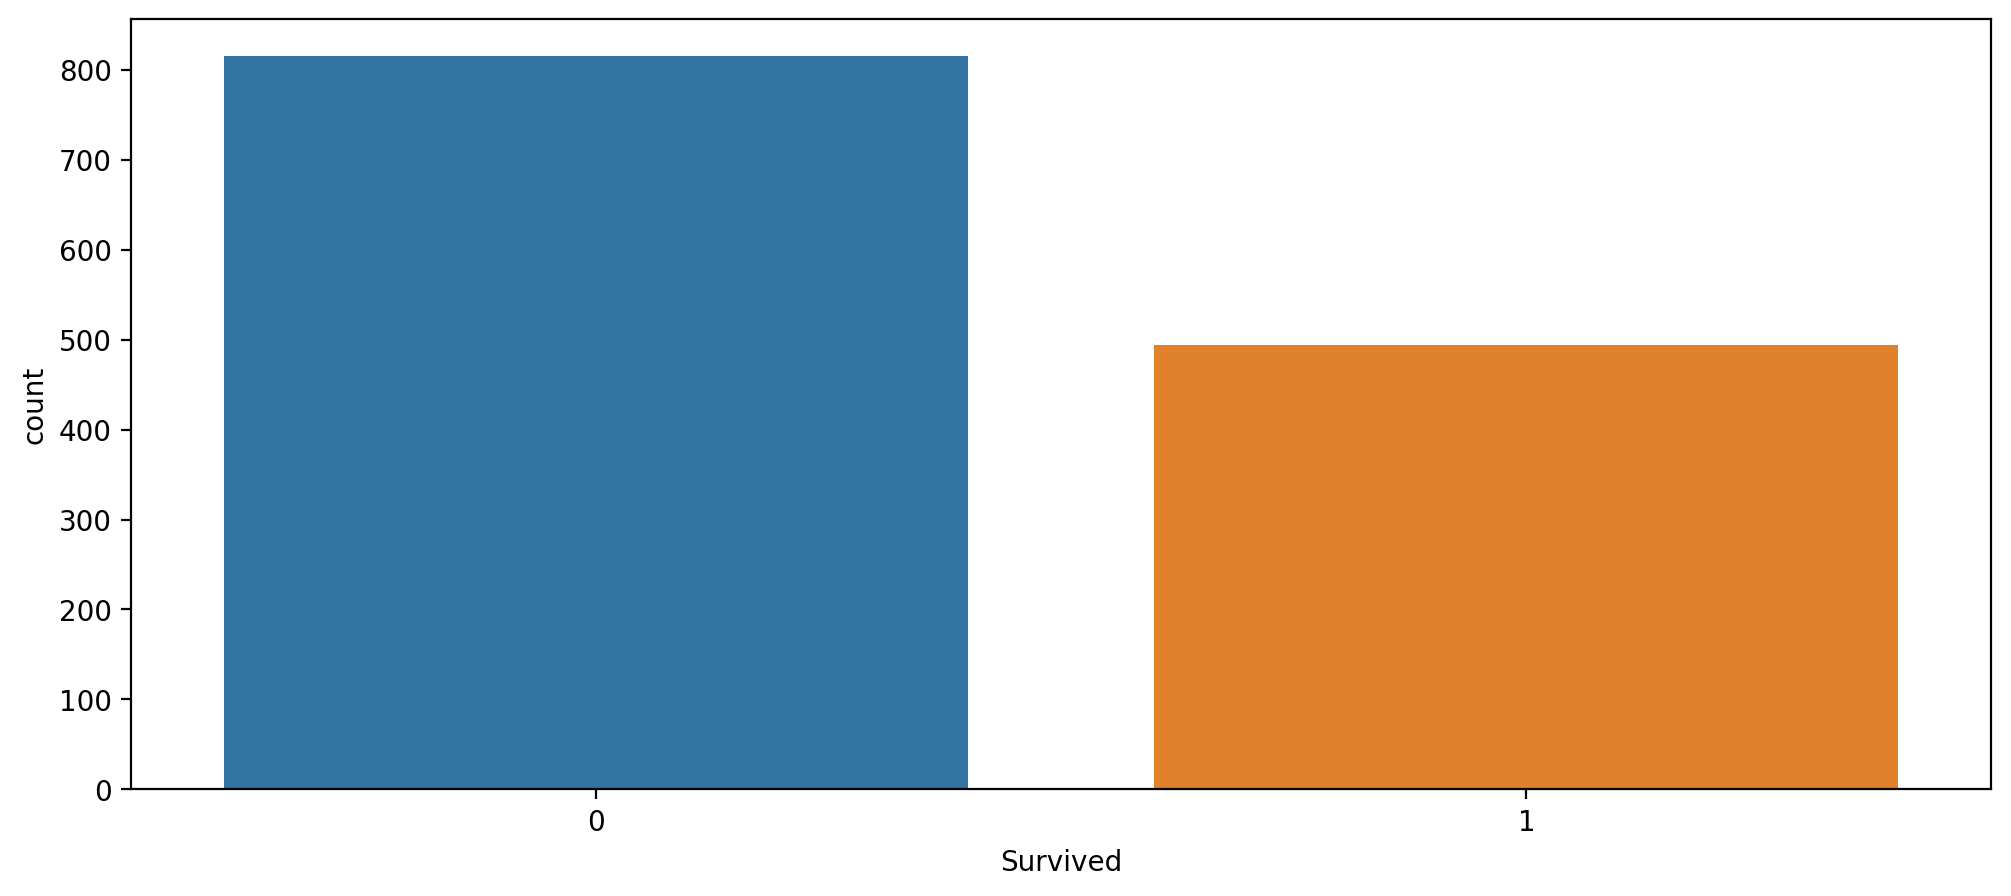

In [40]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='Survived',data=train)#count no of survived and dead

<Axes: xlabel='Sex', ylabel='count'>

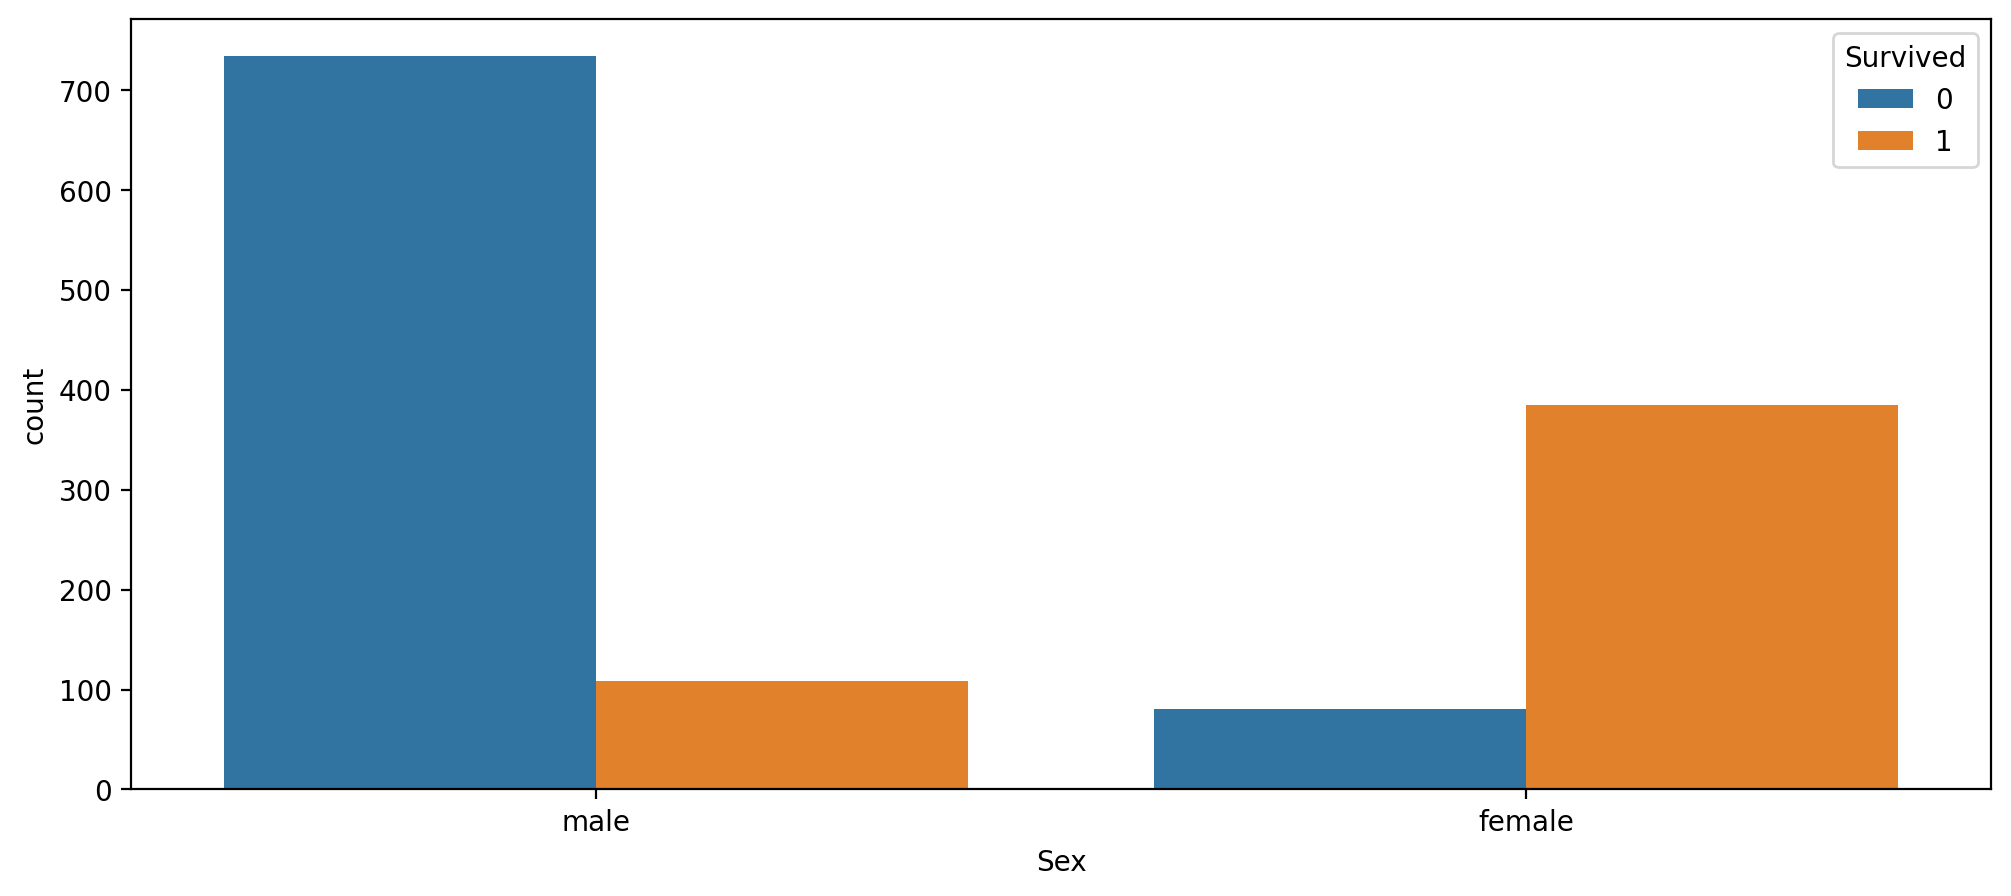

In [41]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='Sex',hue='Survived',data=train) #females survived more 

In [43]:
train.Survived.value_counts() #dead people are 815 and survived 494

0    815
1    494
Name: Survived, dtype: int64

In [44]:
survival_ratio=train.Survived.value_counts(normalize=True)
print('percantage of survivors : ',round(survival_ratio[1]*100,2))
print('percantage of Dead : ',round(survival_ratio[0]*100,2))  #percentage of survivors 38%

percantage of survivors :  37.74
percantage of Dead :  62.26


In [46]:
svl_rate=train.groupby('Sex').Survived.value_counts(normalize=True)
svl_rate  #percentage of female survived 82% and dead 17% ,males 13%survived and dead 87%

Sex     Survived
female  1           0.82618
        0           0.17382
male    0           0.87070
        1           0.12930
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Female Survival')

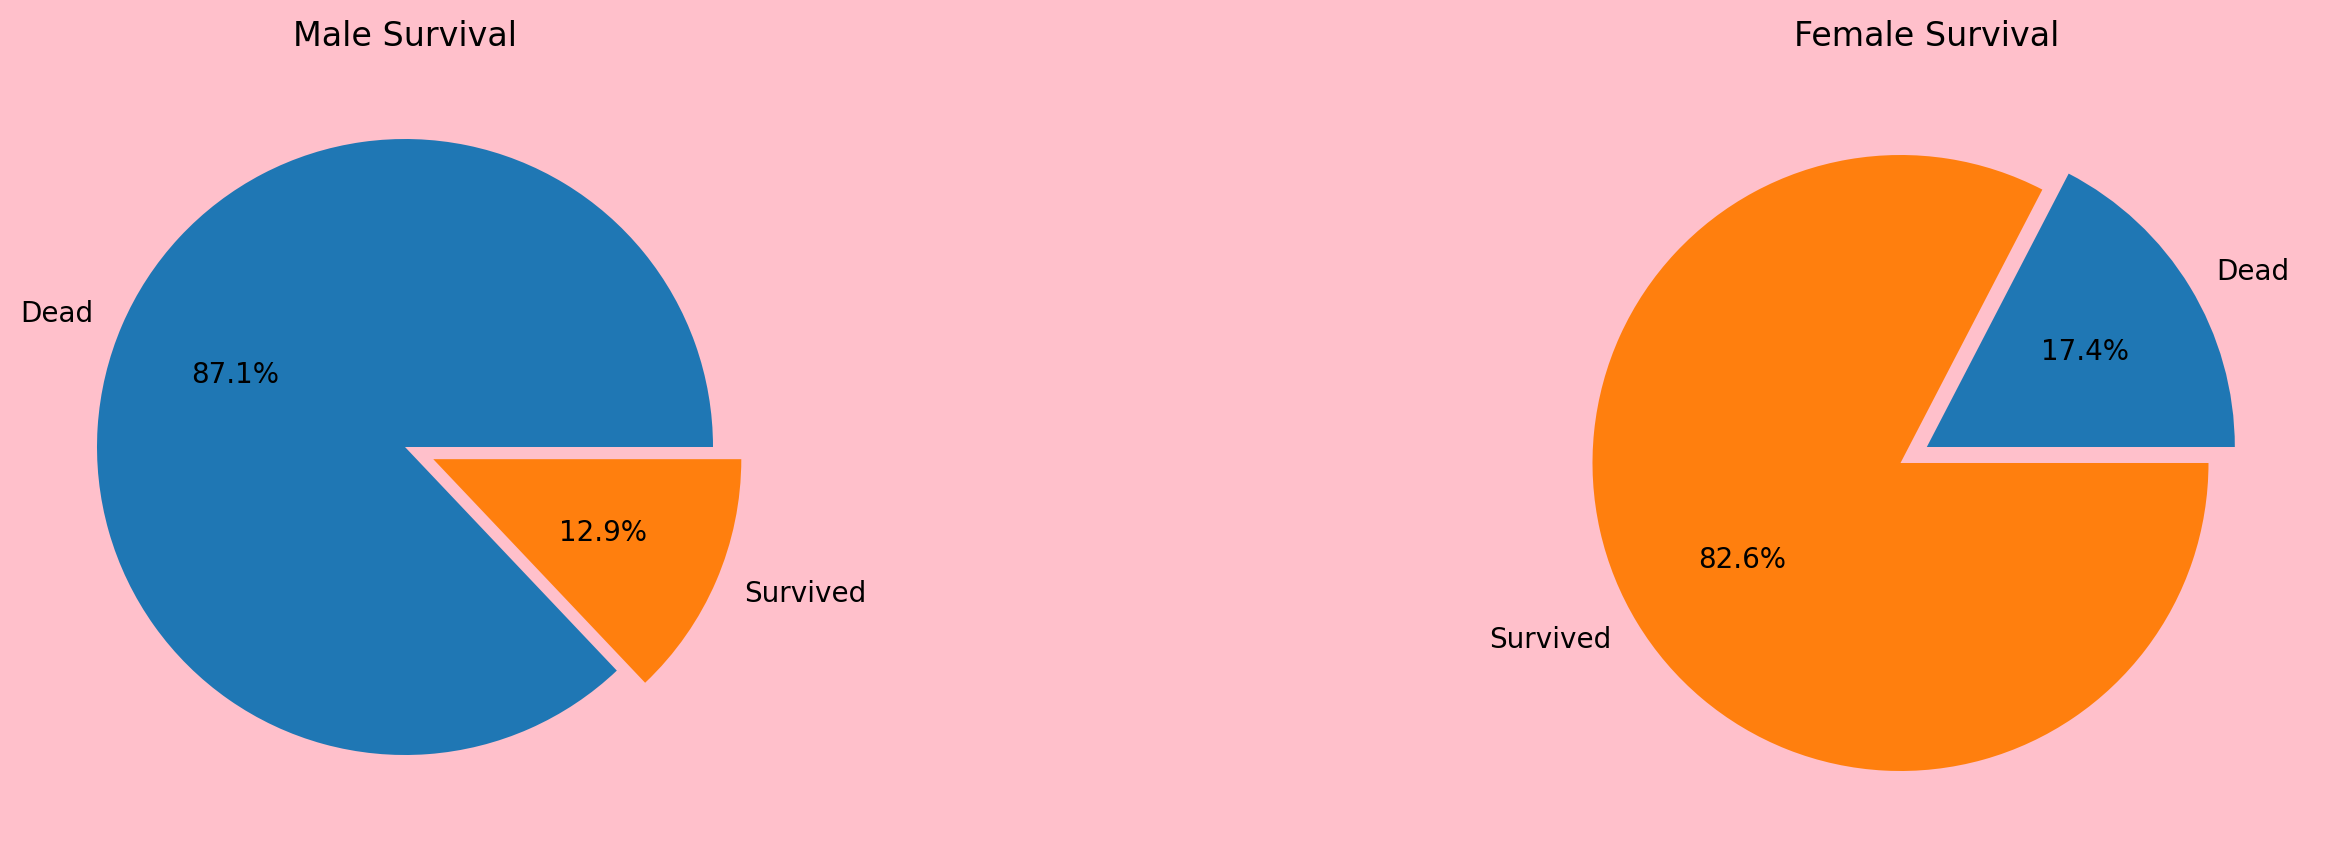

In [52]:
svl_rate=svl_rate.sort_index()
males=svl_rate['male']
females=svl_rate['female']
labels=['Dead','Survived']

plt.figure(figsize=(18,5),dpi=200,facecolor='pink')
plt.subplot(1,2,1)
plt.pie(males,autopct='%1.1f%%',labels=labels,explode=[0,0.1])
plt.title('Male Survival')
plt.subplot(1,2,2)
plt.pie(females,autopct='%1.1f%%',labels=labels,explode=[0,0.1])
plt.title('Female Survival')  #male and female survival and dead piechart 

<Axes: xlabel='Pclass', ylabel='count'>

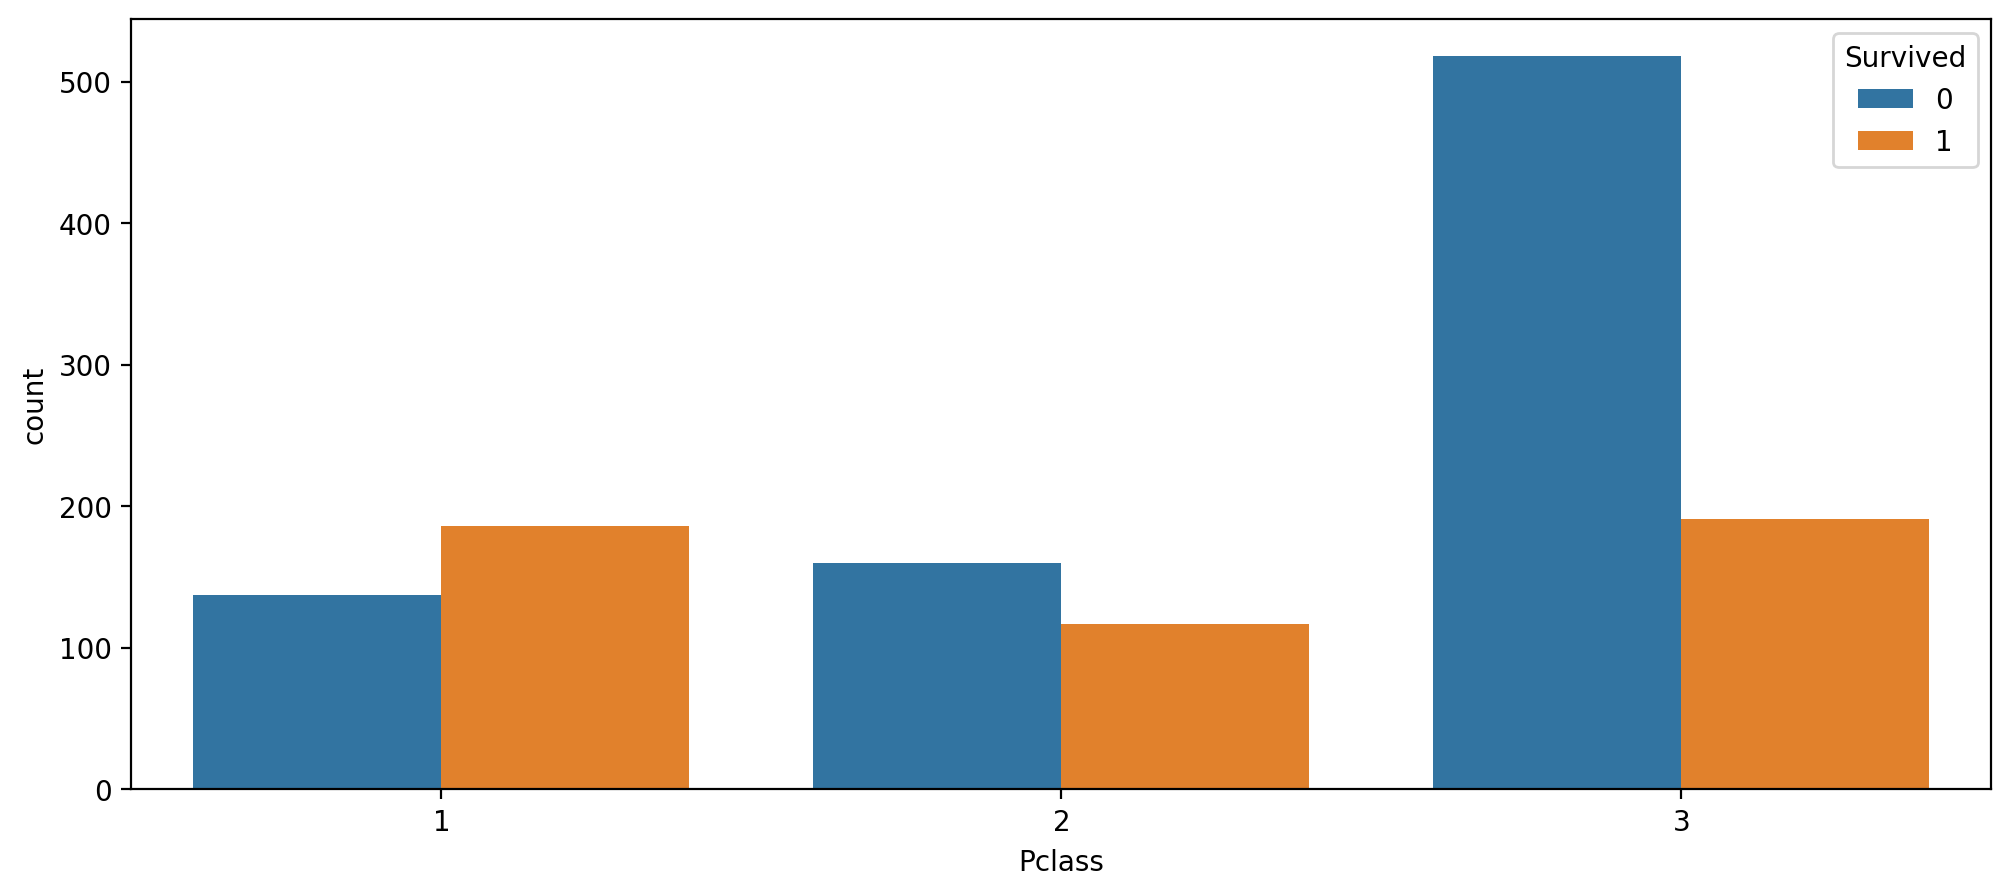

In [53]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='Pclass',hue='Survived',data=train) #1class survived more

In [54]:
svl_rate=train.groupby('Pclass').Survived.value_counts(normalize=True)
svl_rate #1class survived more

Pclass  Survived
1       1           0.575851
        0           0.424149
2       0           0.577617
        1           0.422383
3       0           0.730606
        1           0.269394
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Passenger class3')

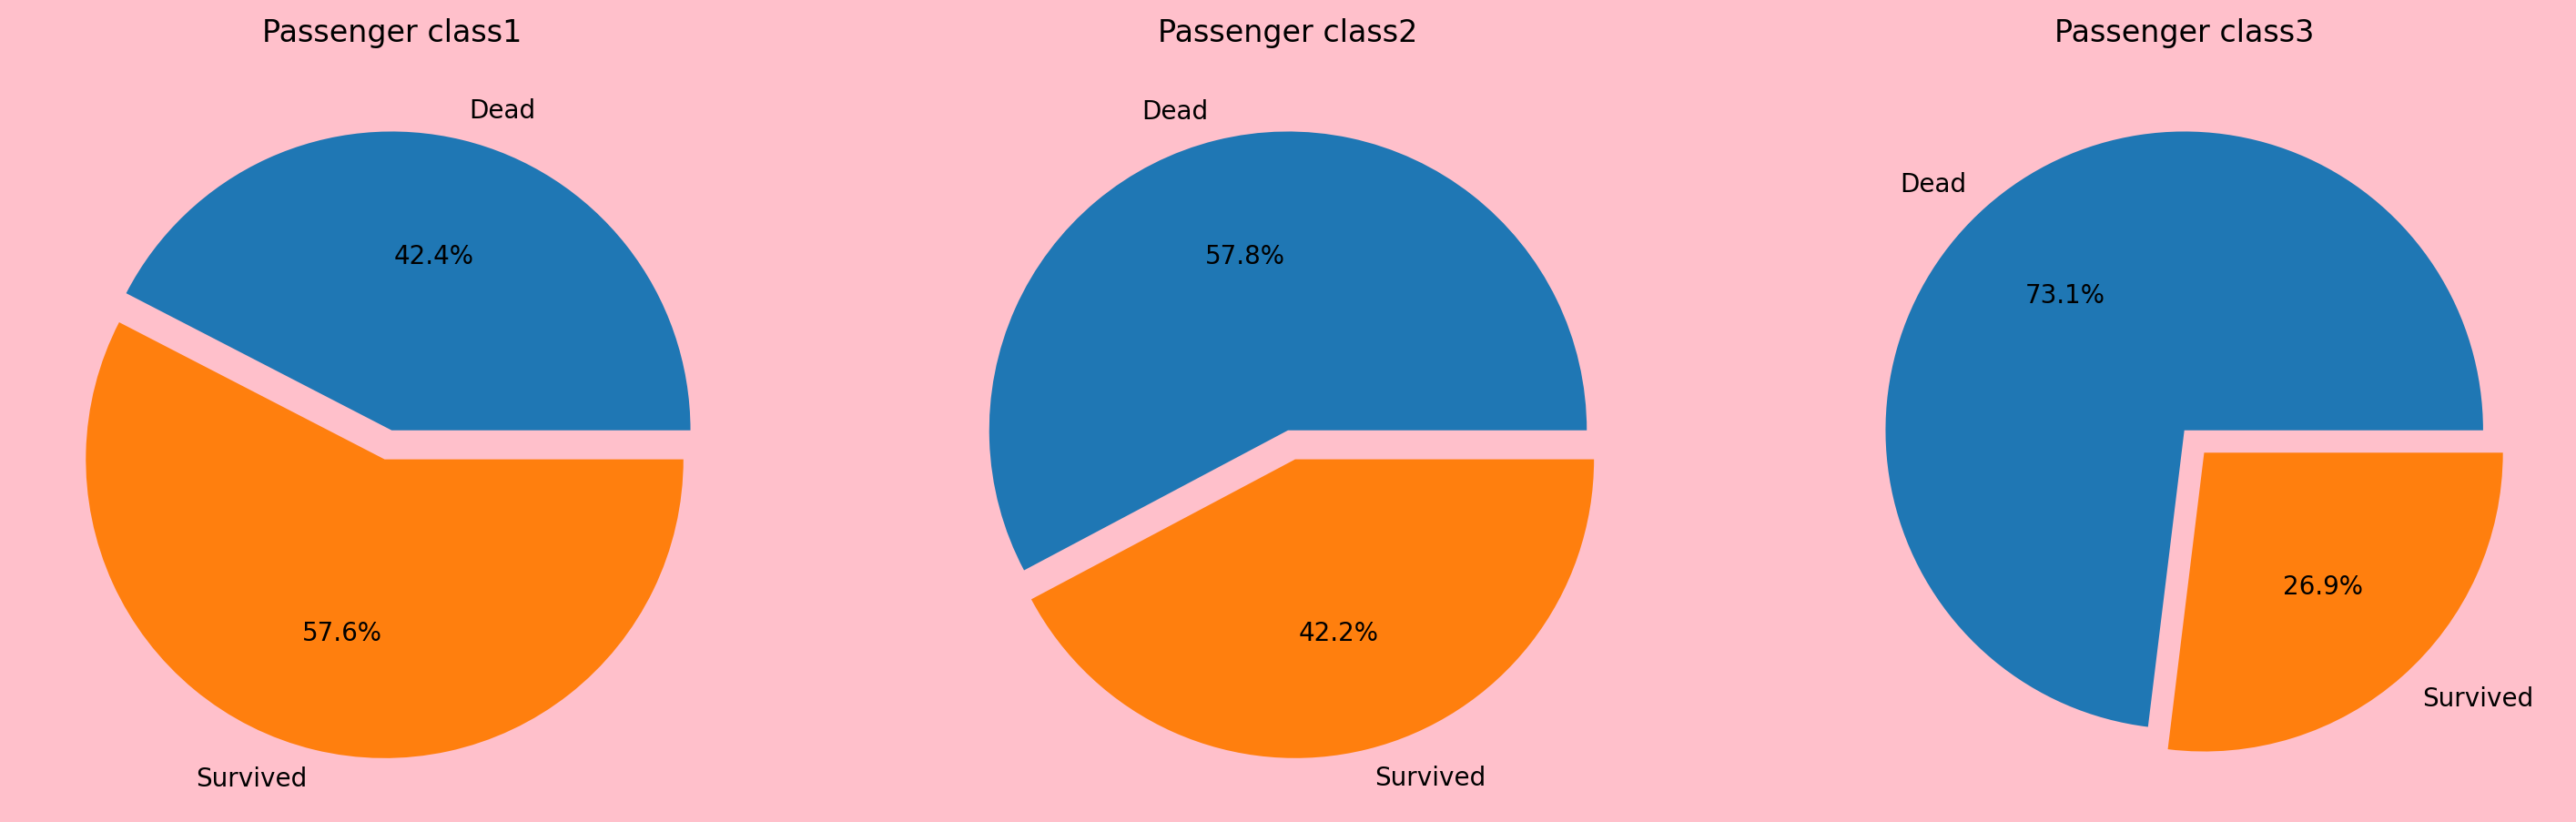

In [55]:
svl_rate=svl_rate.sort_index()
pclass1,pclass2,pclass3=svl_rate[1],svl_rate[2],svl_rate[3]
labels=['Dead','Survived']

plt.figure(figsize=(18,6),dpi=200,facecolor='pink')
plt.subplot(1,3,1)
plt.pie(pclass1,autopct='%1.1f%%',labels=labels,explode=[0,0.1])
plt.title('Passenger class1')
plt.subplot(1,3,2)
plt.pie(pclass2,autopct='%1.1f%%',labels=labels,explode=[0,0.1])
plt.title('Passenger class2')
plt.subplot(1,3,3)
plt.pie(pclass3,autopct='%1.1f%%',labels=labels,explode=[0,0.1])
plt.title('Passenger class3') #pclass1 has more survival

<Axes: xlabel='Embarked', ylabel='count'>

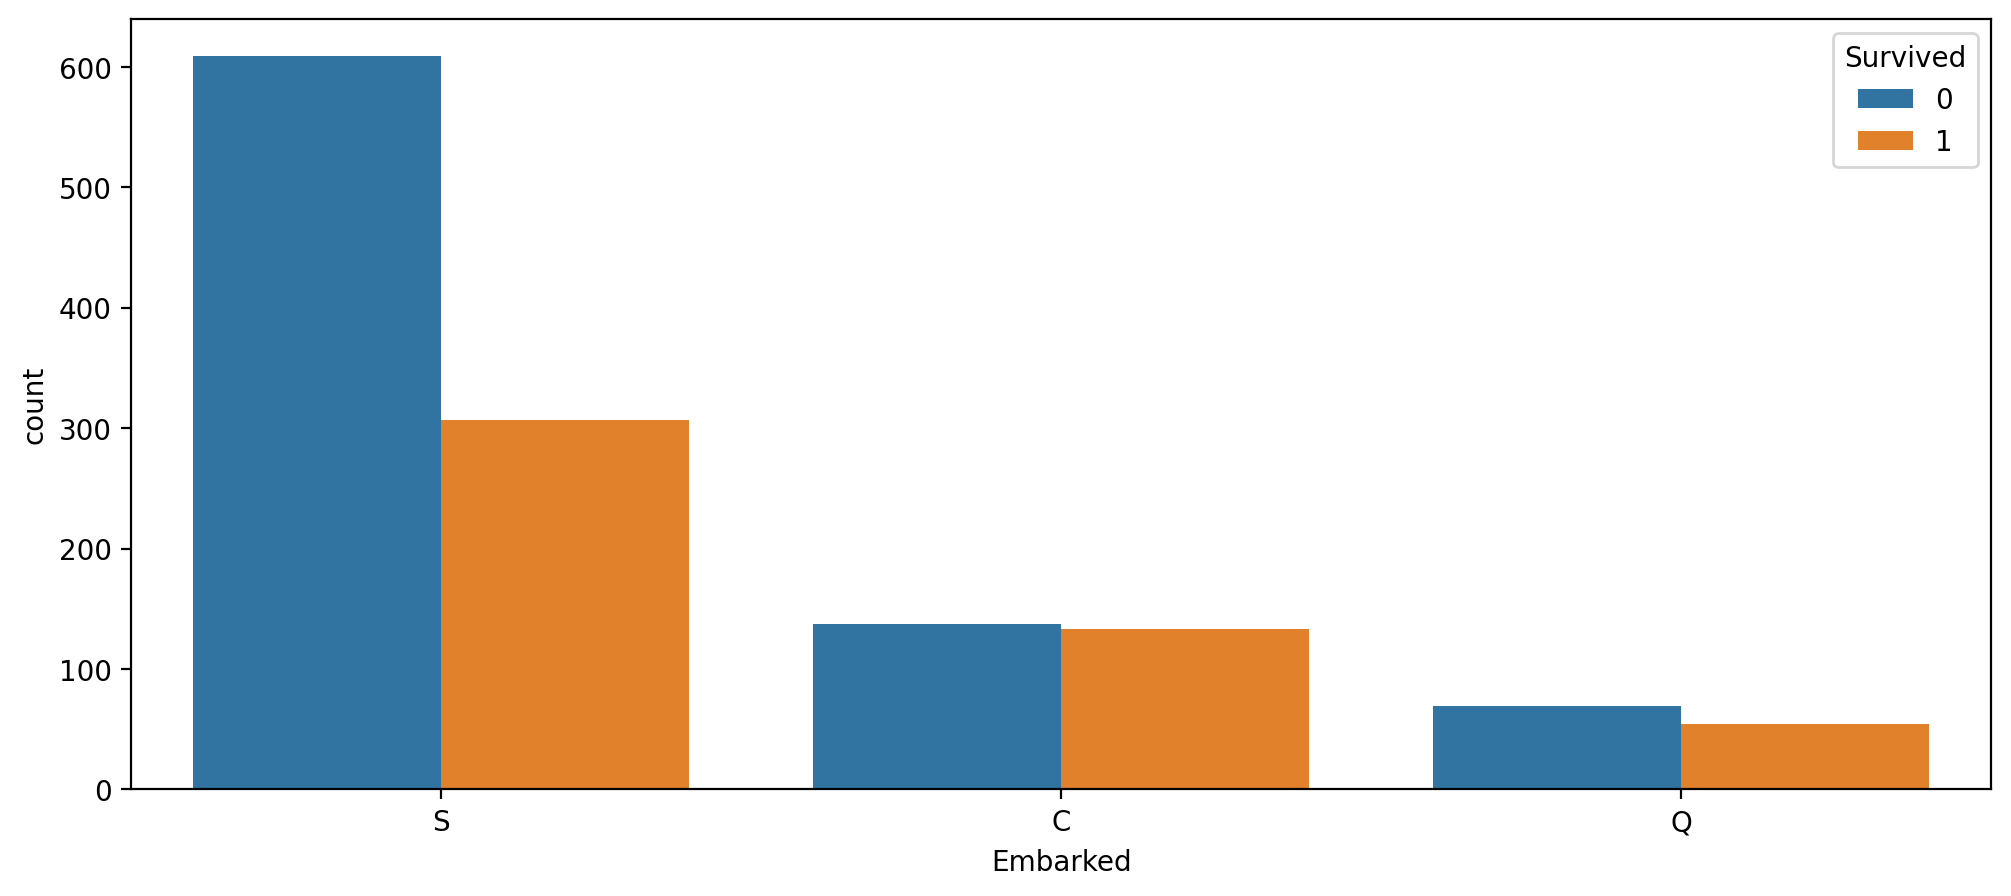

In [56]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='Embarked',hue='Survived',data=train) #embarked s has more death

In [57]:
svl_rate=train.groupby('Embarked')['Survived'].value_counts(normalize=True)
svl_rate #emmbarked c has equal survival and death

Embarked  Survived
C         0           0.507407
          1           0.492593
Q         0           0.560976
          1           0.439024
S         0           0.664847
          1           0.335153
Name: Survived, dtype: float64

<Axes: xlabel='Pclass', ylabel='Fare'>

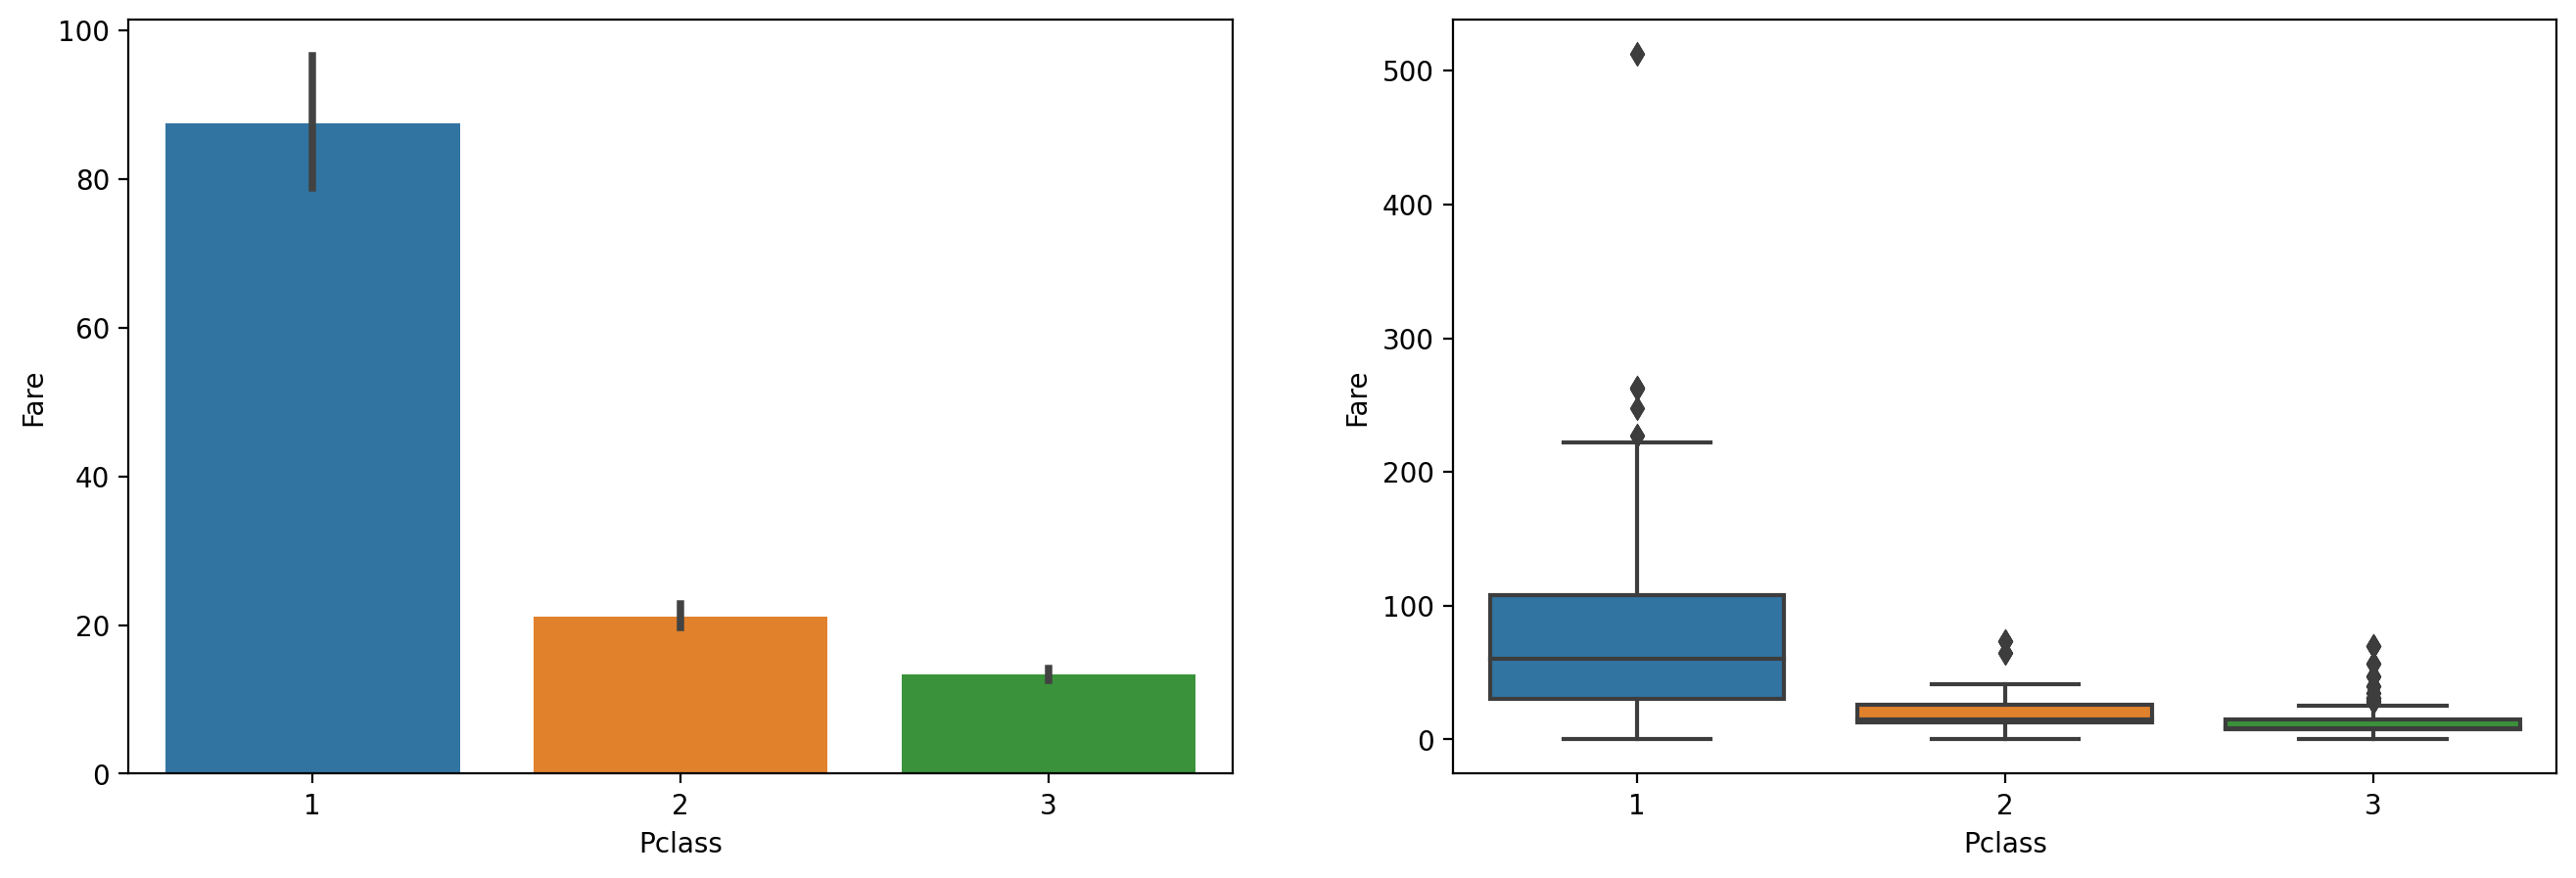

In [74]:
plt.figure(figsize=(16,5),dpi=200)
plt.subplot(1,2,1)
sns.barplot(x='Pclass',y='Fare',data=train)
plt.subplot(1,2,2)
sns.boxplot(x='Pclass',y='Fare',data=train) #pclass1 has high fare


<Axes: xlabel='Survived', ylabel='Fare'>

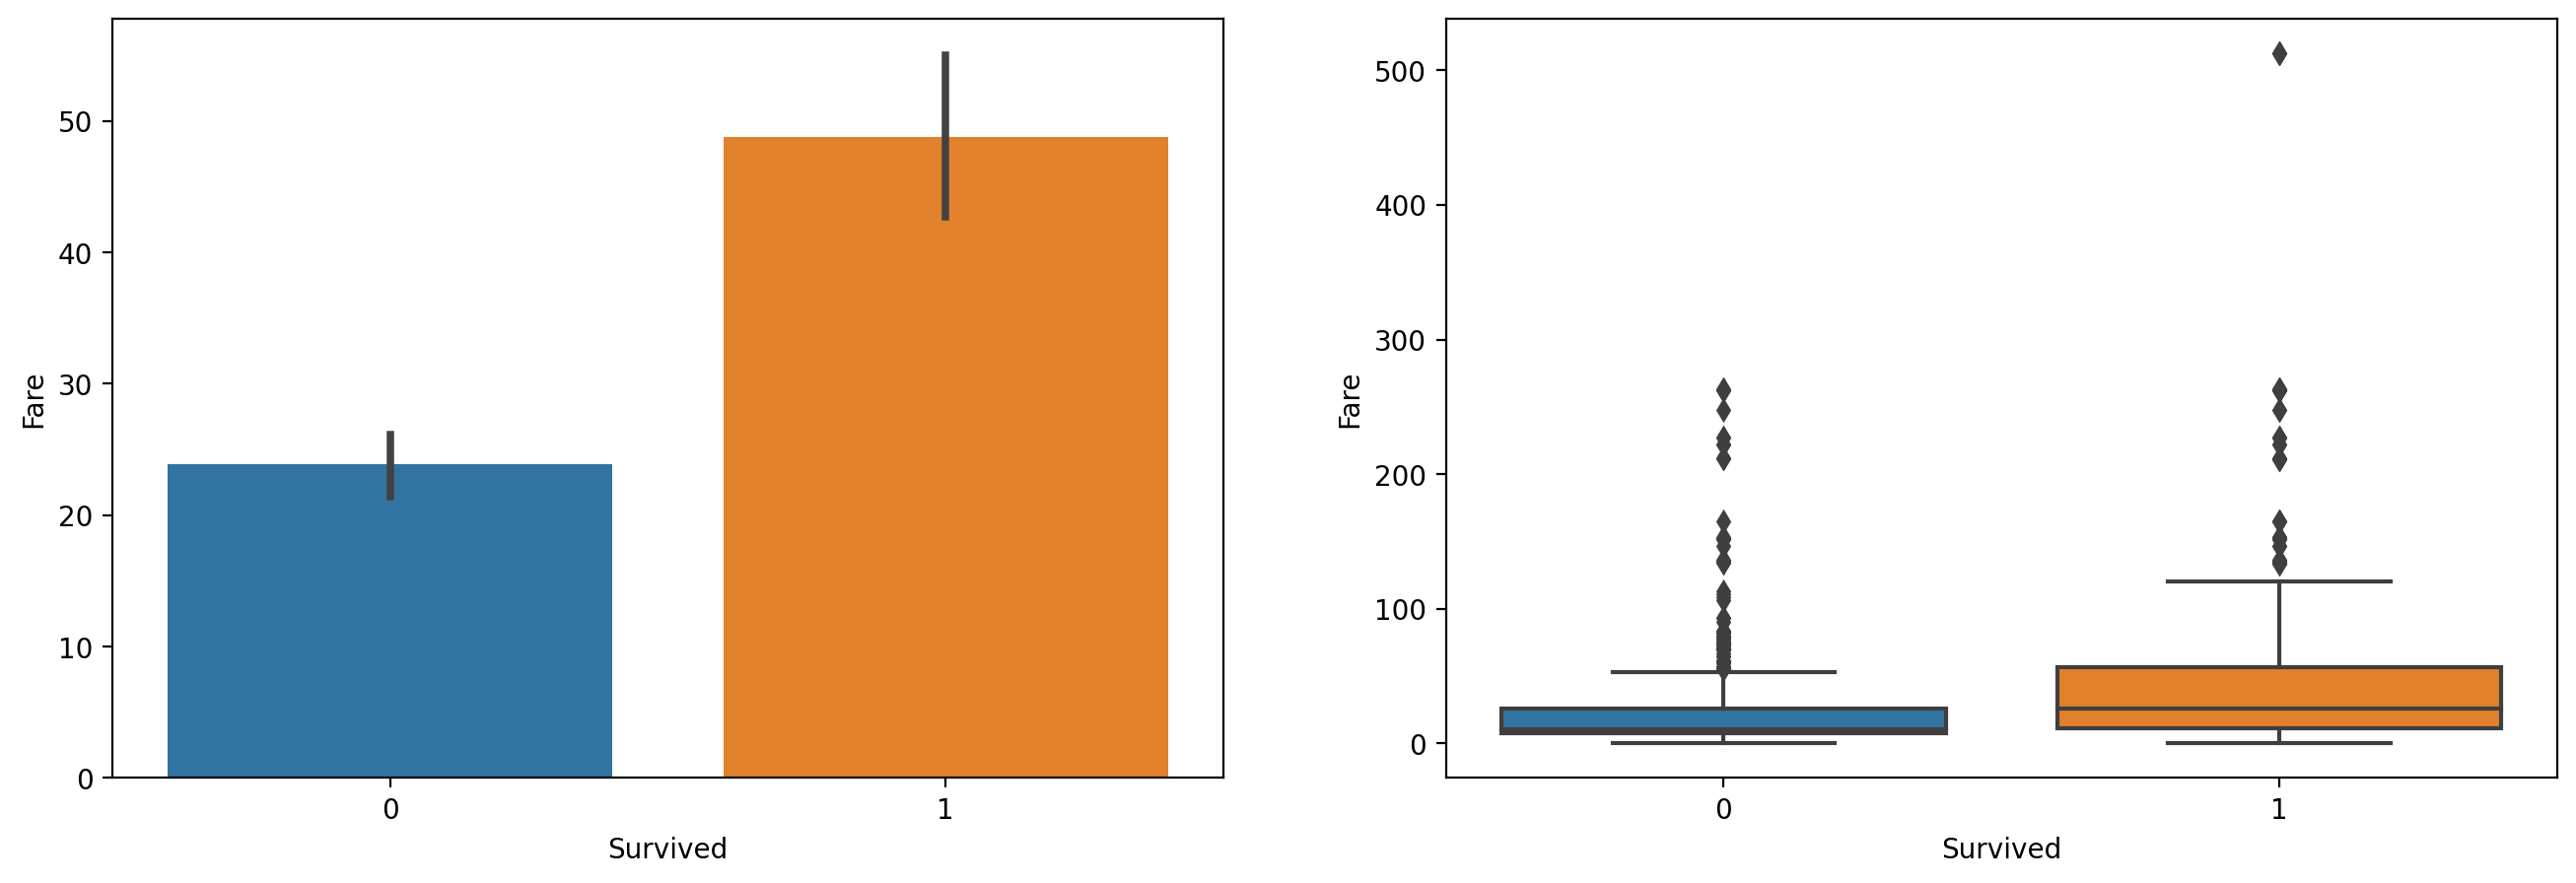

In [60]:
plt.figure(figsize=(16,5),dpi=200)
plt.subplot(1,2,1)
sns.barplot(x='Survived',y='Fare',data=train)
plt.subplot(1,2,2)
sns.boxplot(x='Survived',y='Fare',data=train) #high fare has high survival rate


In [61]:
train[train.Fare>500] #high fare paid passengers were survived 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C
1234,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C


<Axes: xlabel='Survived', ylabel='Age'>

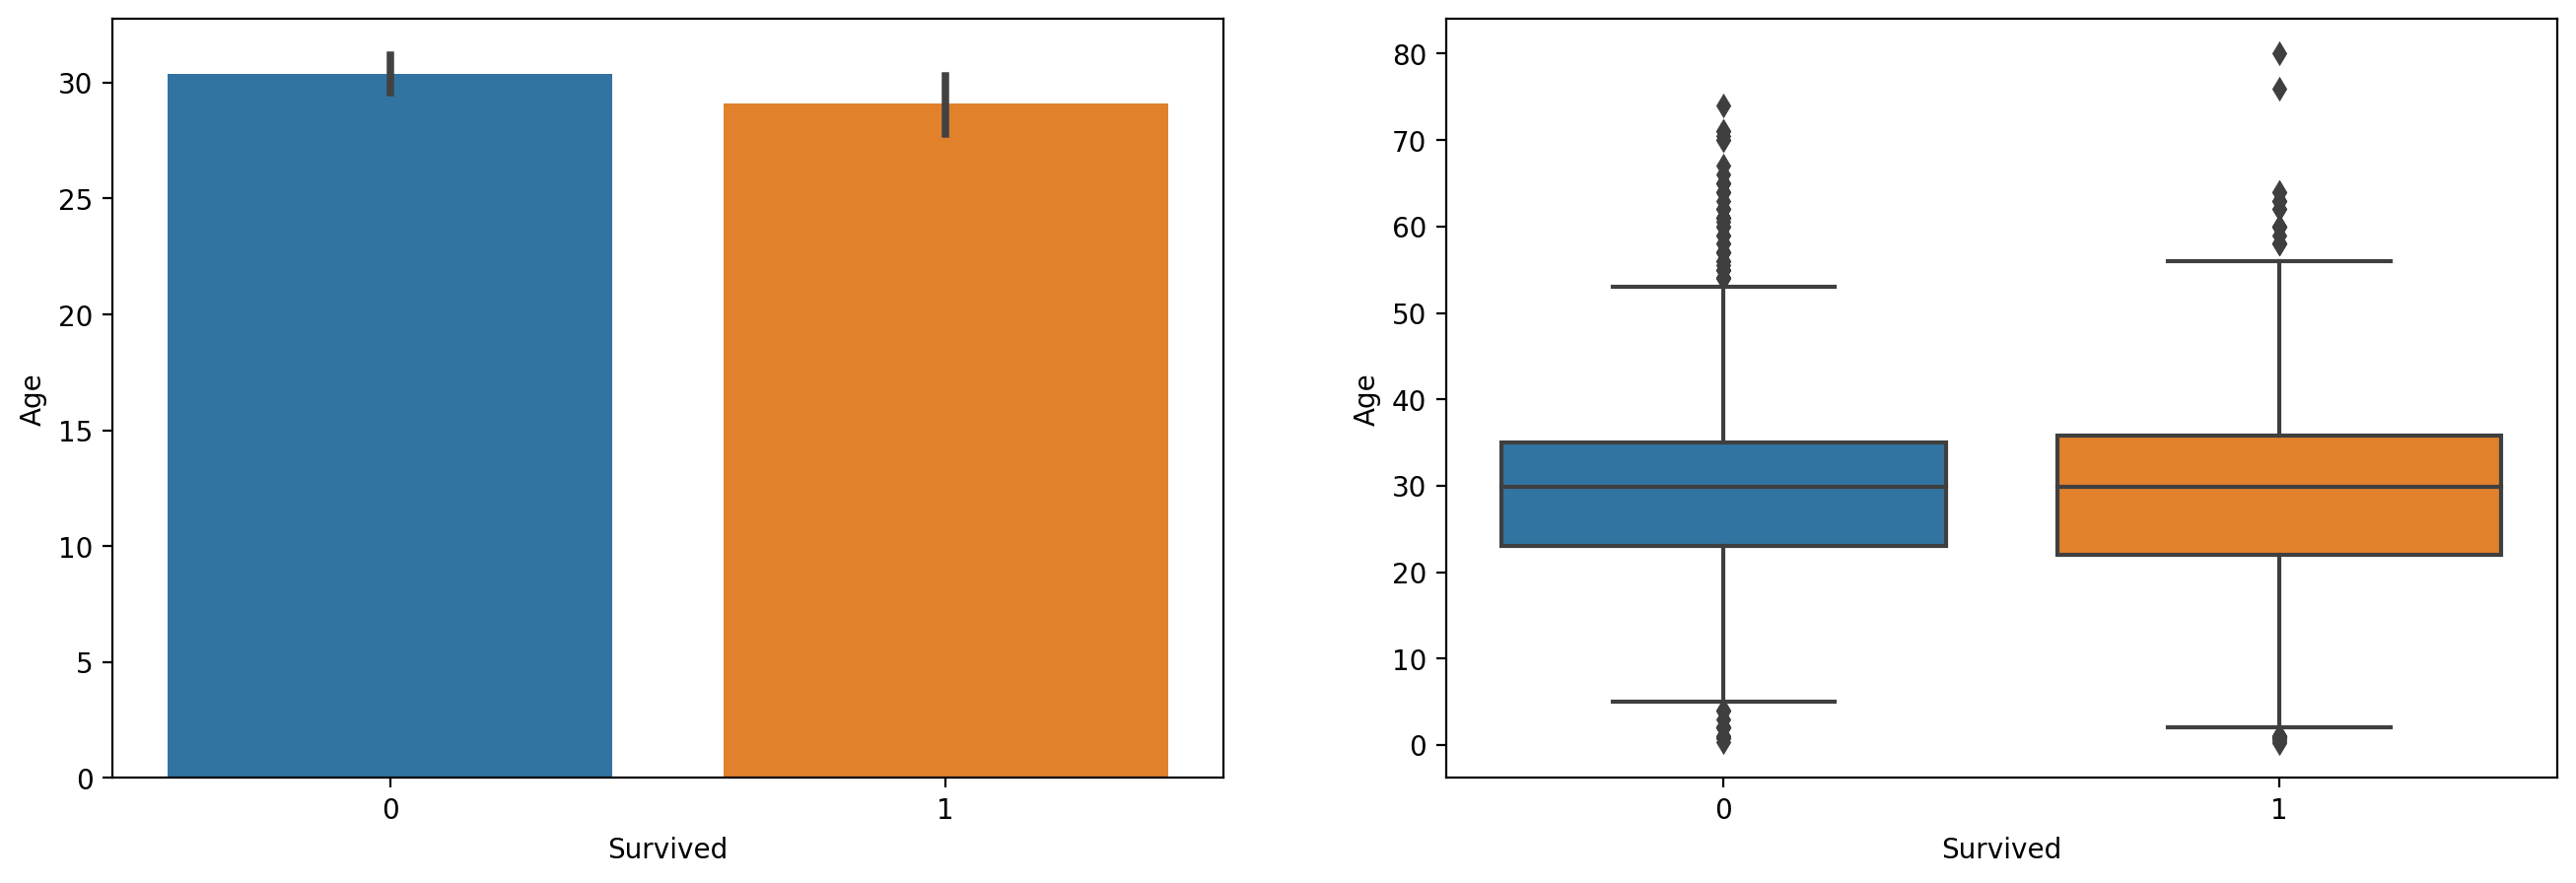

In [72]:
plt.figure(figsize=(16,5),dpi=200)
plt.subplot(1,2,1)
sns.barplot(x='Survived',y='Age',data=train)
plt.subplot(1,2,2)
sns.boxplot(x='Survived',y='Age',data=train) #Age has no connectivity with survival because it has equal survival as well as death

<Axes: ylabel='Age'>

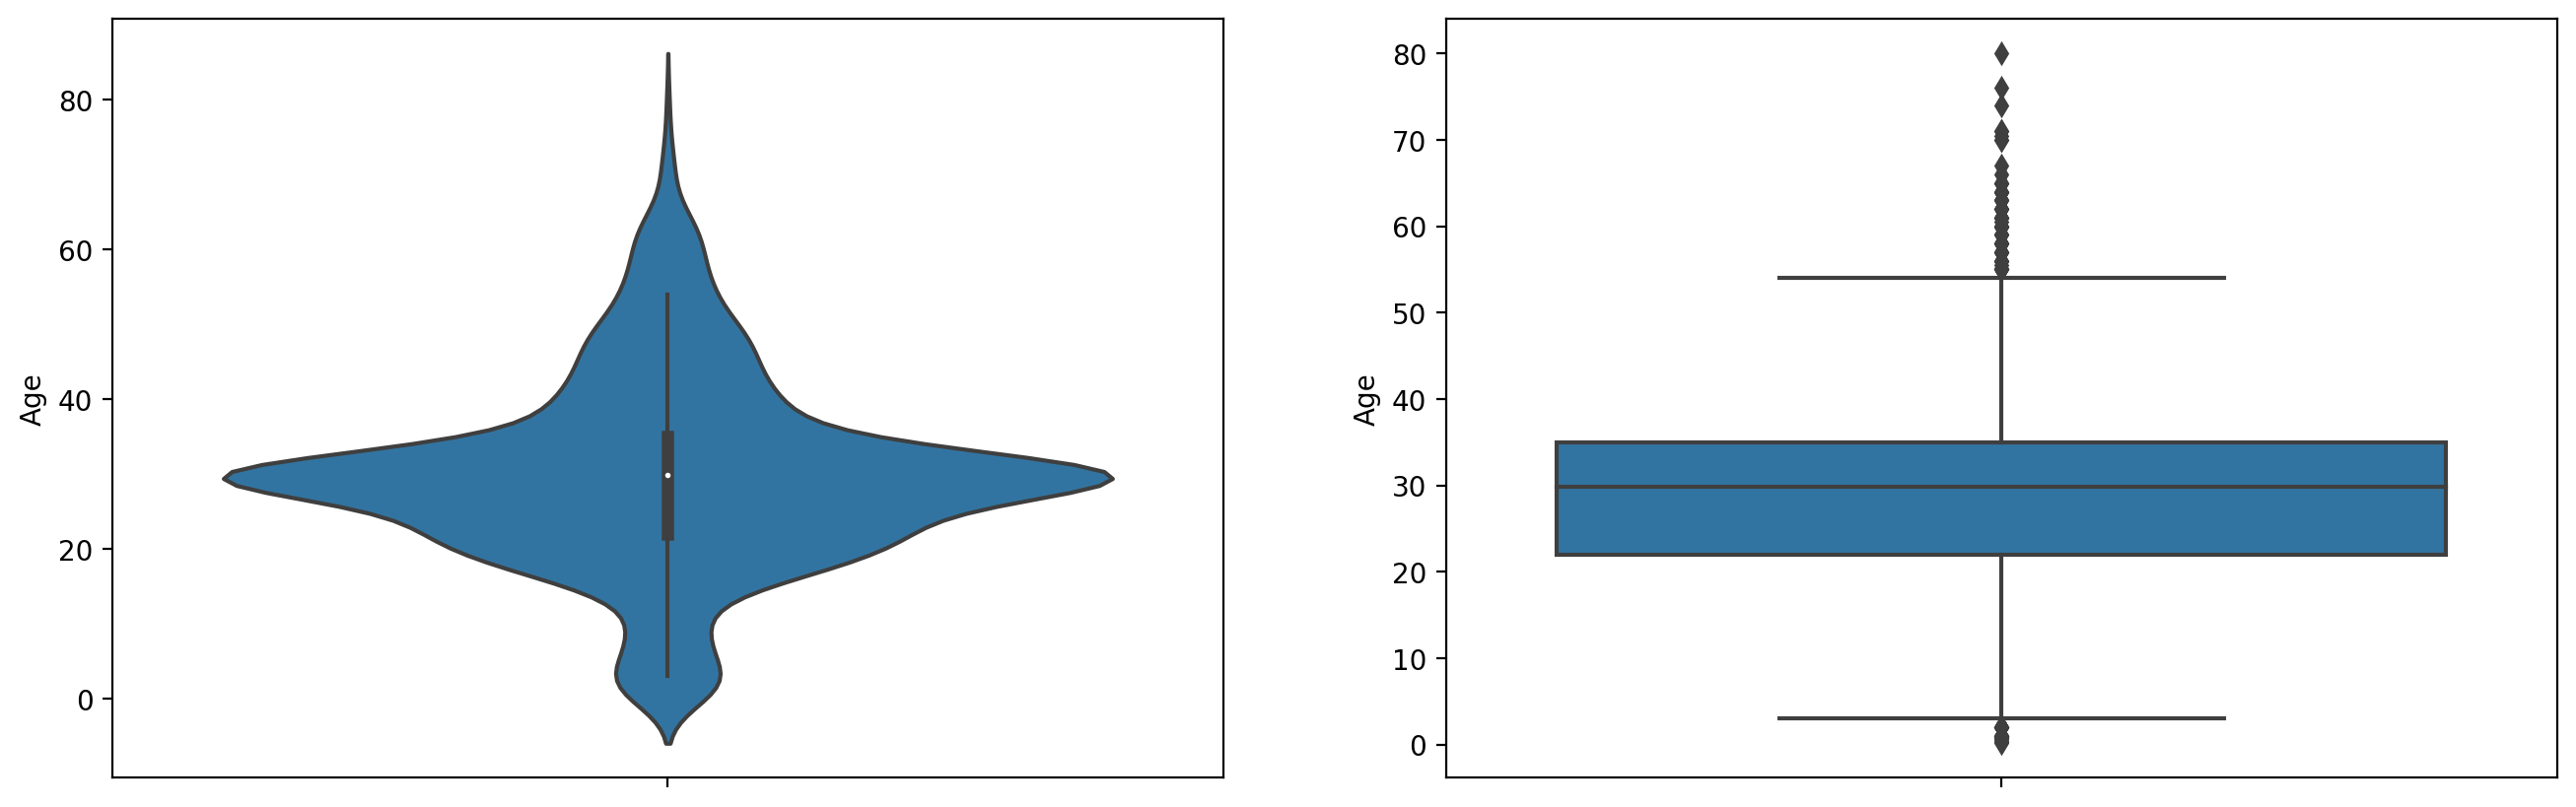

In [64]:
plt.figure(figsize=(16,5),dpi=200)
plt.subplot(1,2,1)
sns.violinplot(y='Age',data=train)
plt.subplot(1,2,2)
sns.boxplot(y='Age',data=train) #more passengers from 20 to 40 age 


<Axes: xlabel='family_members', ylabel='count'>

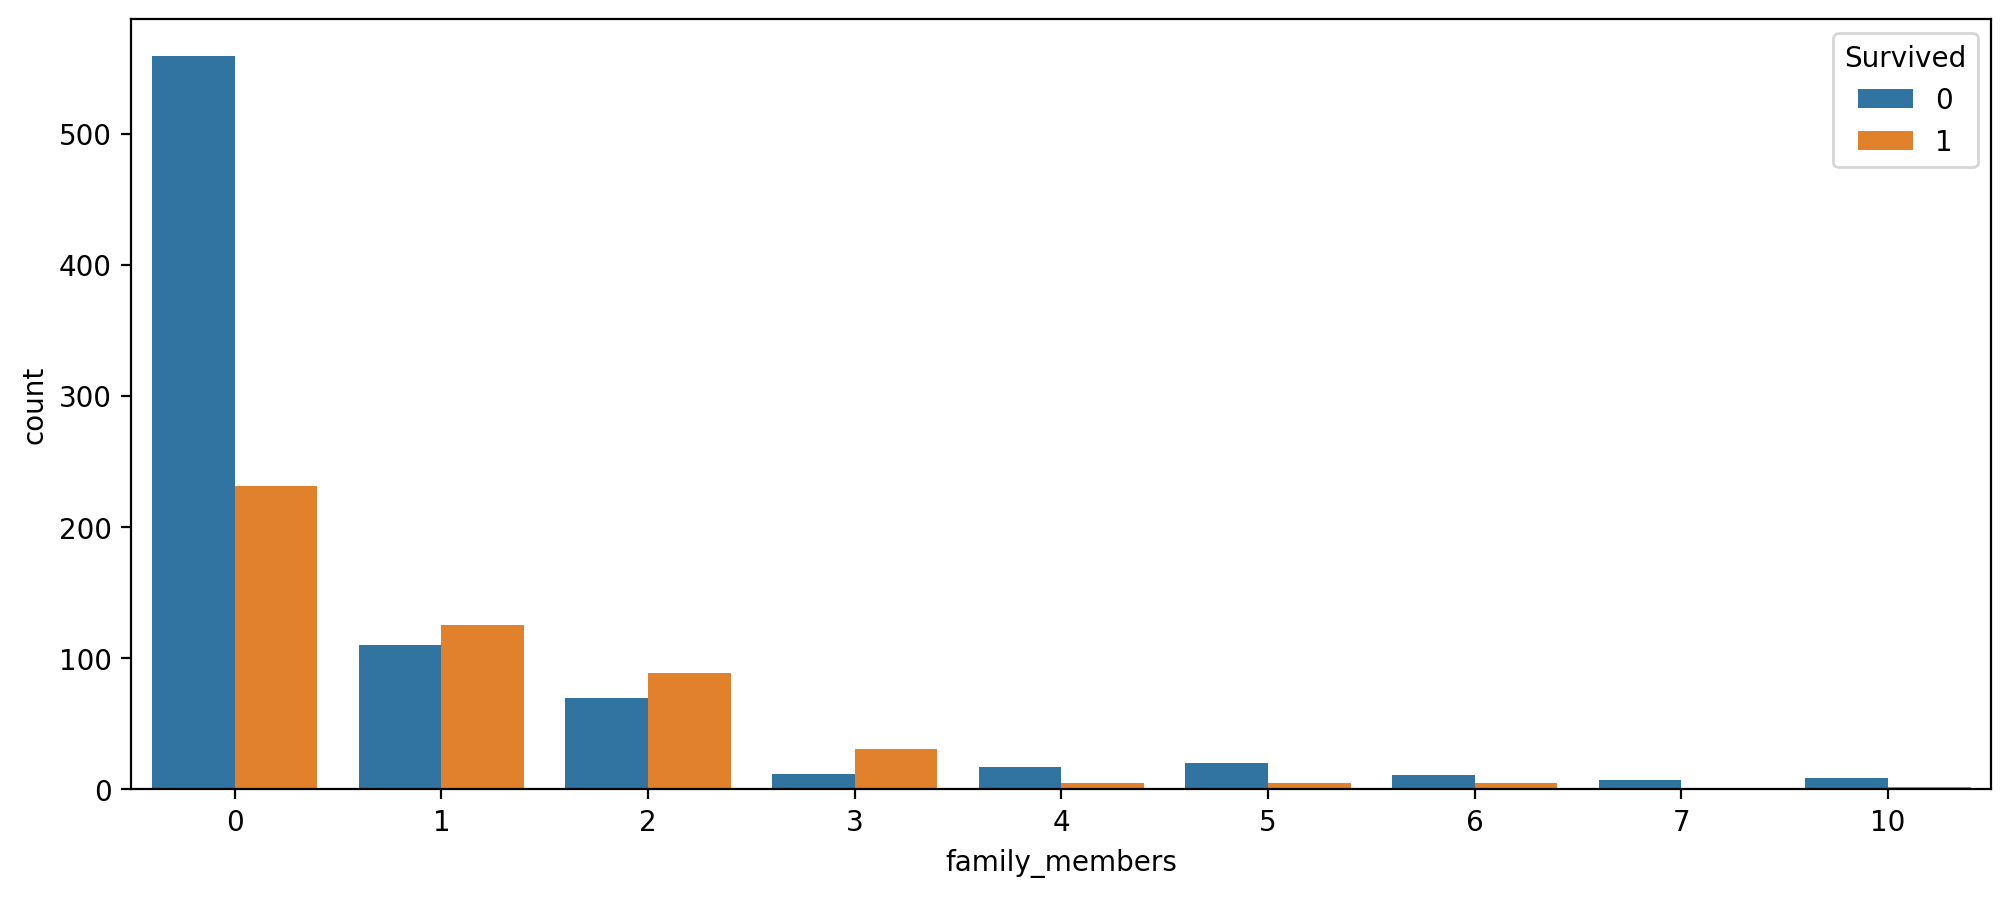

In [70]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='family_members',hue='Survived',data=train) #more family members and no family memebers survived less ,less family members survived more 

In [79]:
train.corr() #correlation between each column

,PassengerId,Survived,Pclass,Age,Fare,family_members
PassengerId,1.000000,-0.020370,-0.038354,0.025731,0.031428,-0.031437
Survived,-0.020370,1.000000,-0.264710,-0.048483,0.233622,0.061090
Pclass,-0.038354,-0.264710,1.000000,-0.366371,-0.558629,0.050027
Age,0.025731,-0.048483,-0.366371,1.000000,0.171893,-0.196996
Fare,0.031428,0.233622,-0.558629,0.171893,1.000000,0.226492
family_members,-0.031437,0.061090,0.050027,-0.196996,0.226492,1.000000


<Axes: >

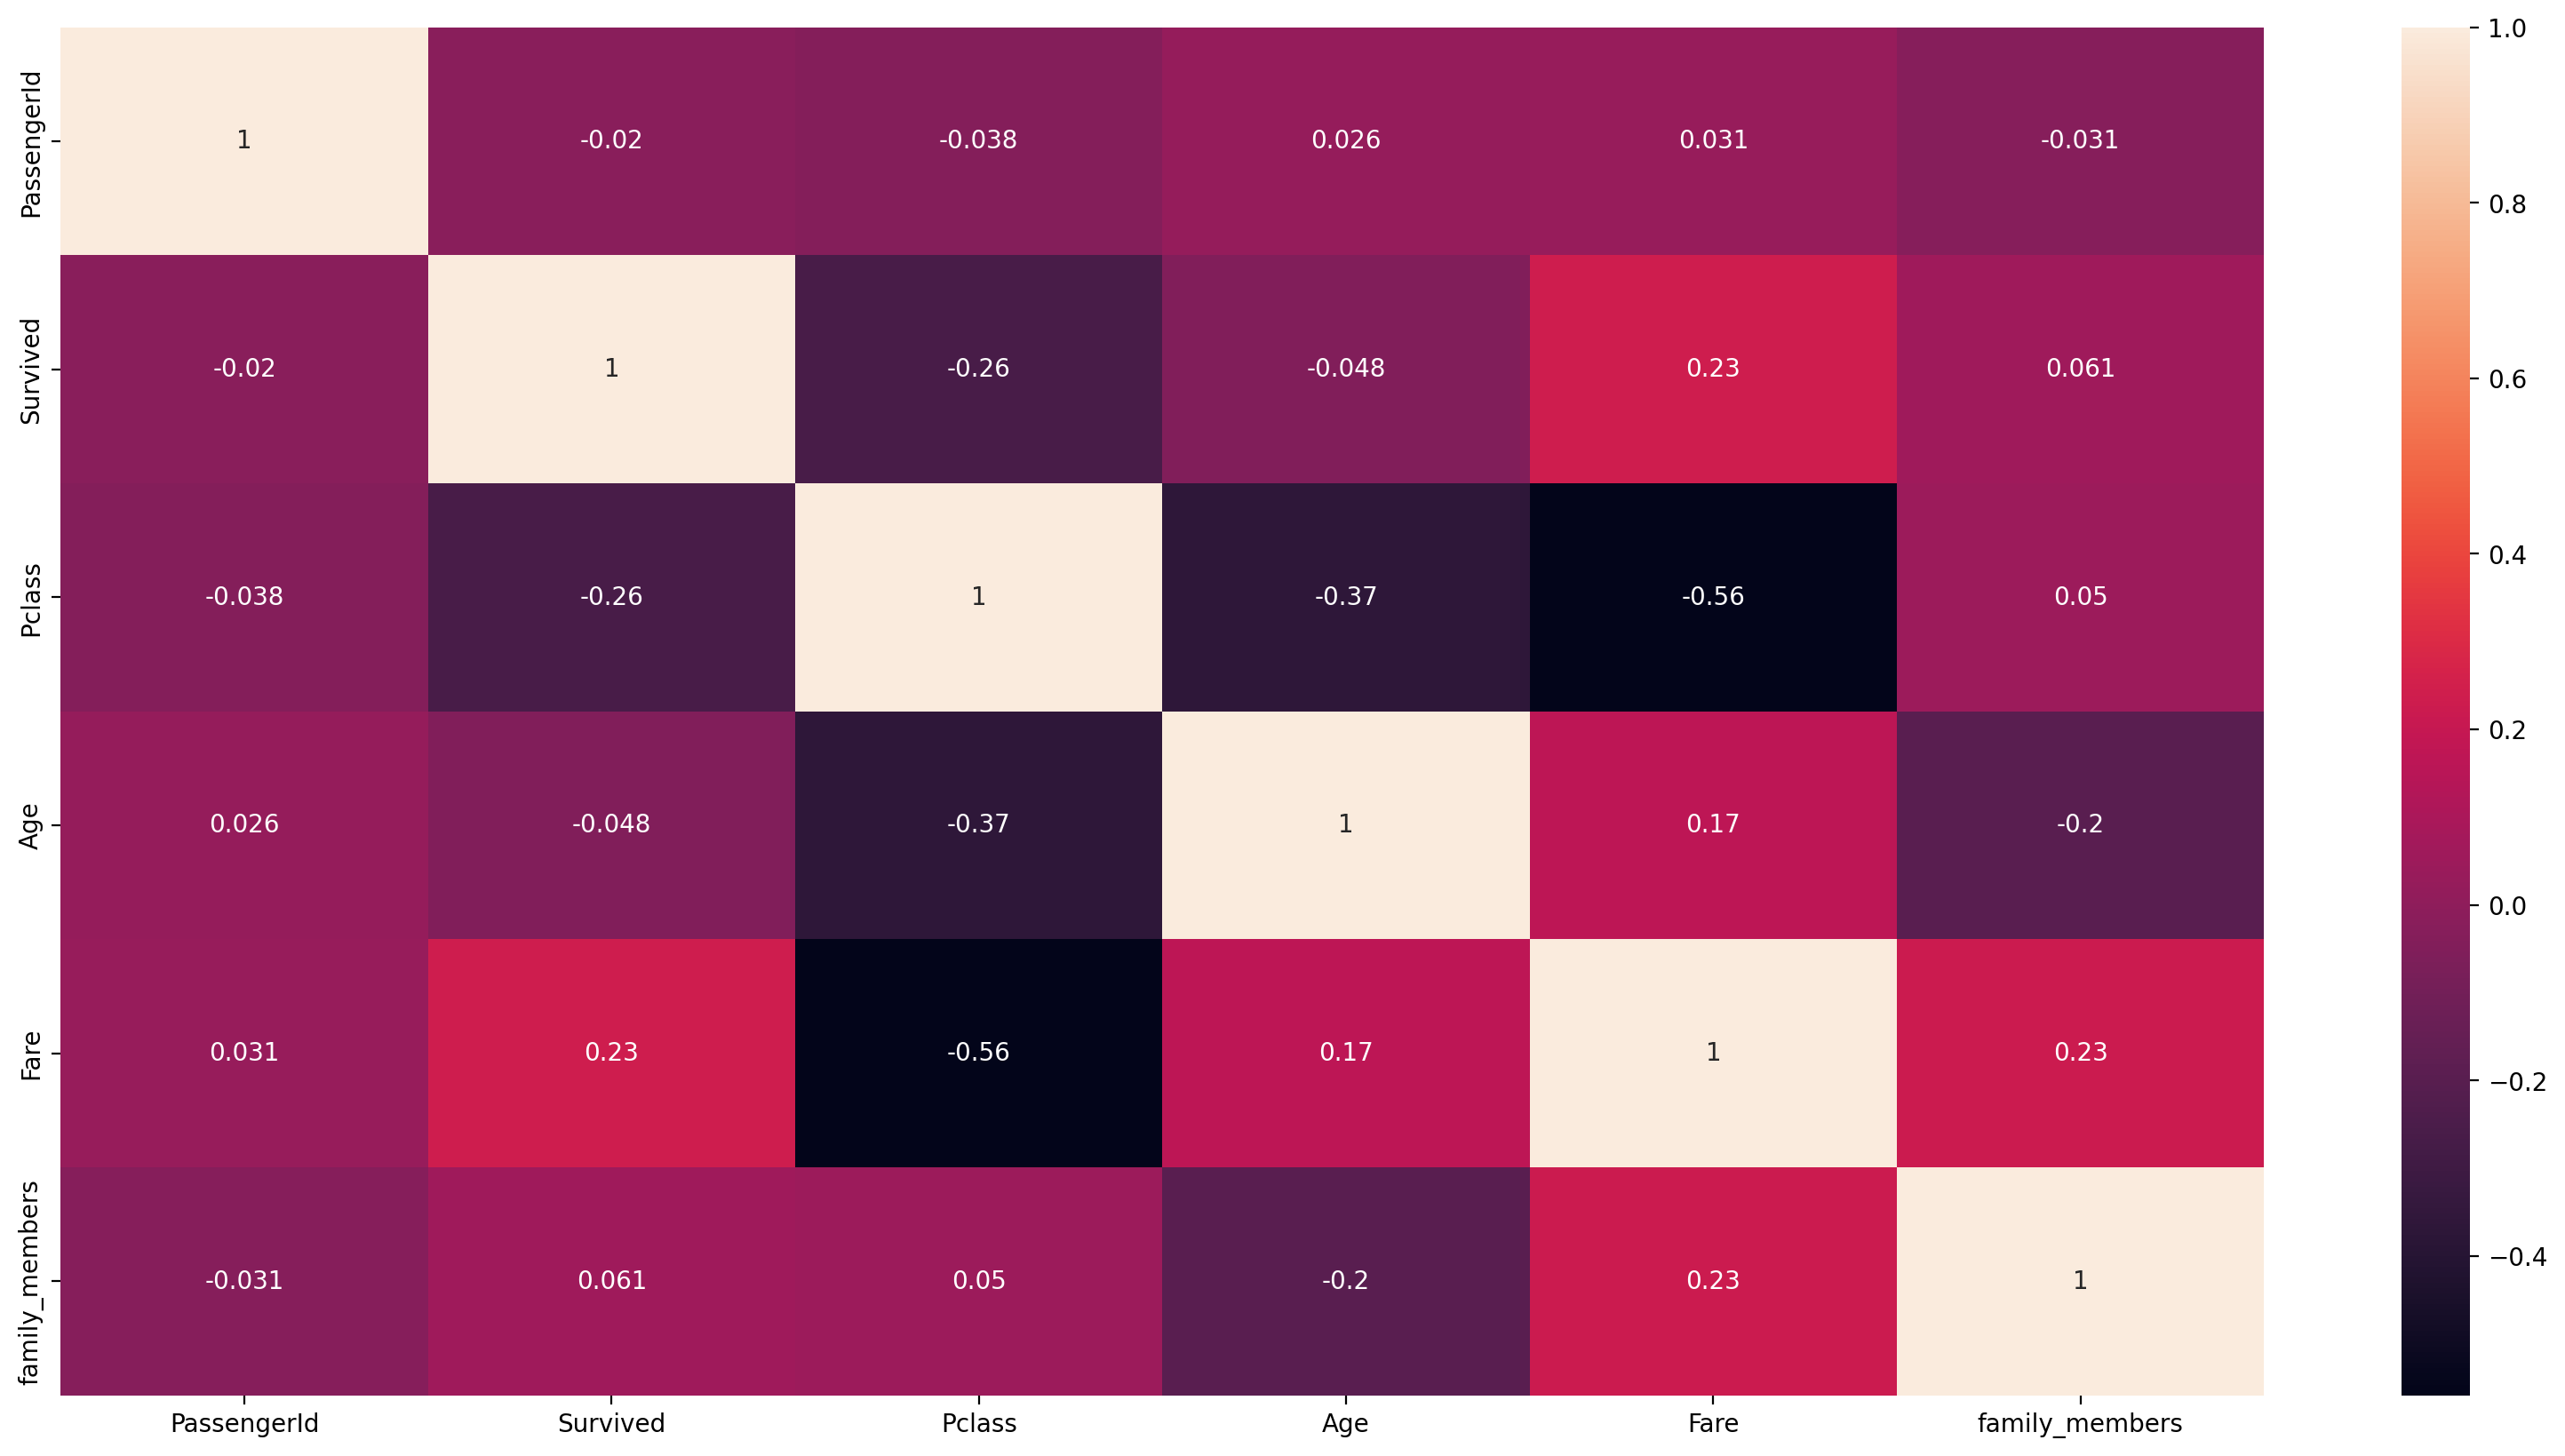

In [80]:
plt.figure(figsize=(20,10),dpi=200)
sns.heatmap(train.corr(),annot=True) #heat map shows correlation between columns